# Regression Lab: Wine Quality Prediction

## Overview

In this lab, we apply linear regression to predict wine quality using physicochemical properties.

**Dataset**: Wine Quality (UCI ML Repository)
- **Samples**: ~1,600 red wine samples
- **Features**: 11 physicochemical properties
- **Target**: Quality rating (0-10)

**Original Paper:** P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, "Modeling wine preferences by data mining from physicochemical properties," Decision Support Systems, vol. 47, no. 4, pp. 547–553, Nov. 2009, doi: 10.1016/j.dss.2009.05.016. Available: https://repositorium.uminho.pt/server/api/core/bitstreams/f3dd2aa2-9eda-4eba-b50e-6306a0bd0c66/content

**Dataset Reference:** P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. "Wine Quality," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C56S3T.

**Wine Chemistry video from ["World of Wine"](https://www.edx.org/learn/wine/university-of-adelaide-world-of-wine-from-grape-to-glass) edX course**: https://www.youtube.com/watch?v=K5zPfWoWDlM

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Data

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

print(f"Dataset shape: {df.shape}") # TODO
print(f"Columns: {list(df.columns)}") # TODO

Dataset shape: (1599, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Step 3: Initial Inspection

In [12]:
print("First 5 rows:")
# TODO: print first 5 rows of the dataframe
print(df.head())

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

In [11]:
print("\nData info:")
# TODO: print dataframe info
print(df.info())


Data info:
<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [13]:
print("\nSummary statistics:")
# TODO: print summary statistics of the dataframe
print(df.describe())


Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

## Step 4: EDA - Target Variable Distribution

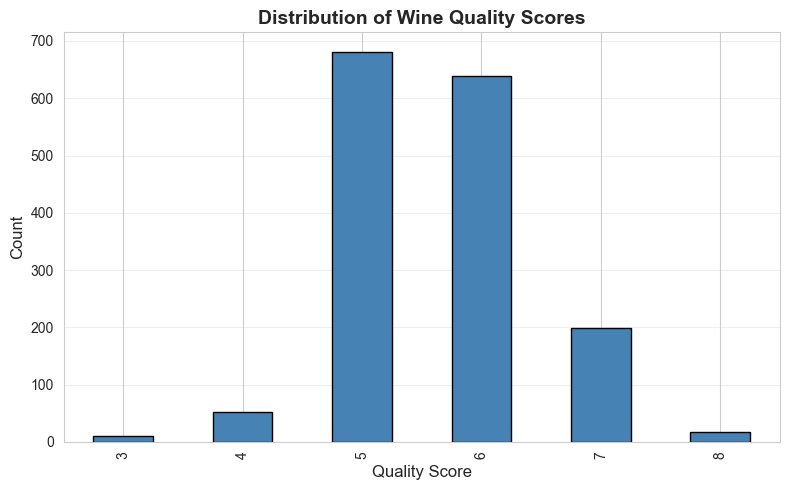

Quality - Min: 3, Max: 8, Mean: 5.64


In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
quality_counts = df['quality'].value_counts().sort_index()
quality_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')

ax.set_xlabel('Quality Score', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Quality - Min: {df['quality'].min()}, Max: {df['quality'].max()}, Mean: {df['quality'].mean():.2f}")

## Step 5: EDA - Feature Distributions

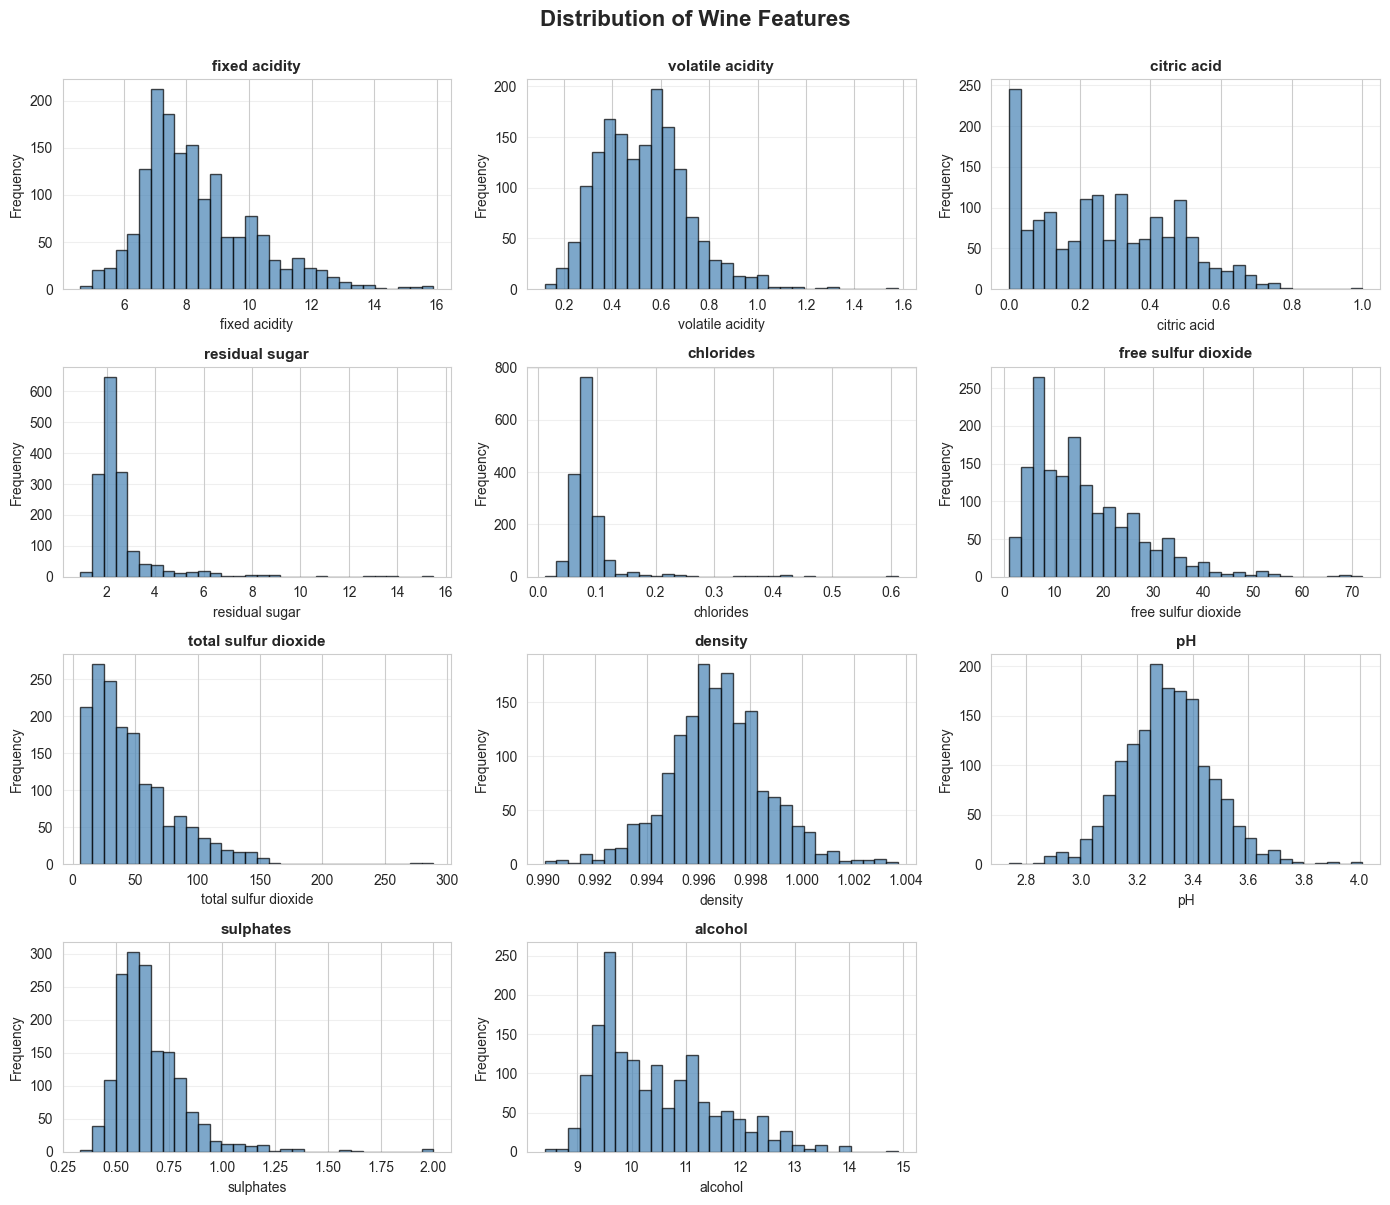

In [6]:
features = [col for col in df.columns if col != 'quality']
fig, axes = plt.subplots(4, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, feature in enumerate(features):
    df[feature].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

fig.delaxes(axes[-1])
fig.suptitle('Distribution of Wine Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Step 6: EDA - Features by Quality Level

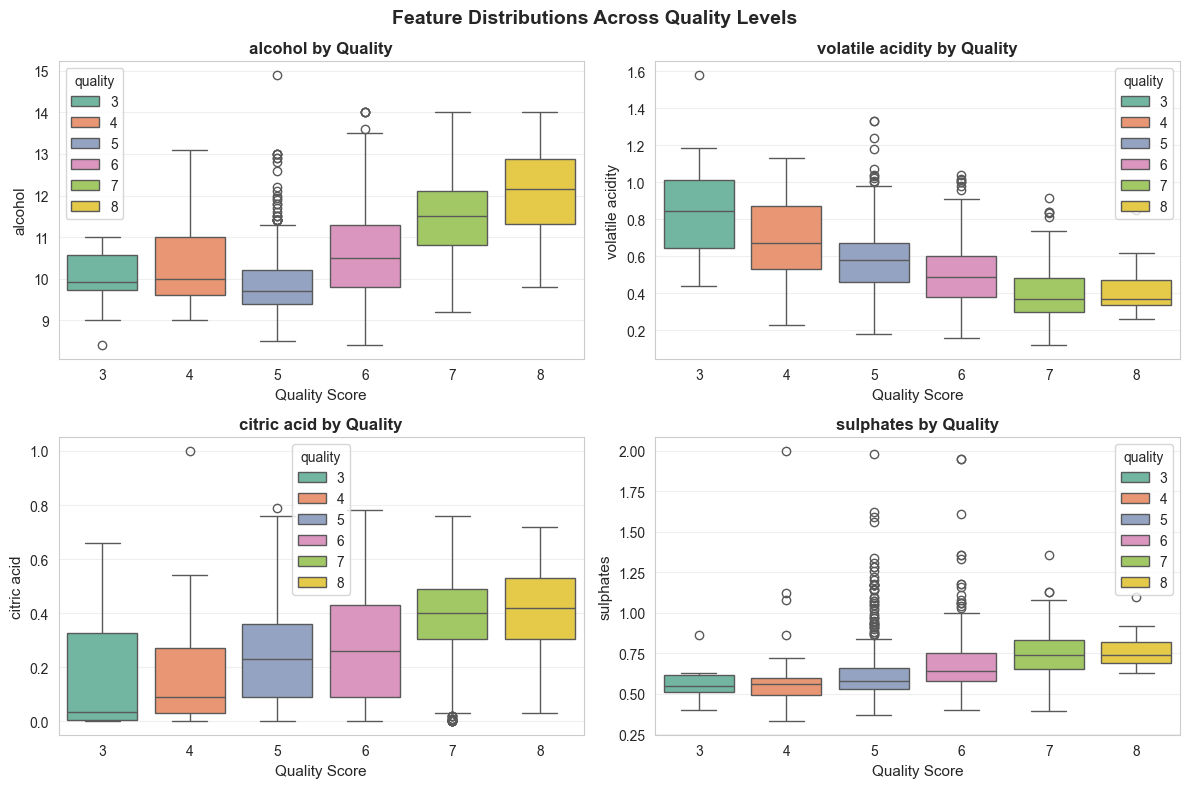

In [7]:
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    sns.boxplot(data=df, x='quality', y=feature, hue='quality', ax=axes[idx], palette='Set2')
    axes[idx].set_xlabel('Quality Score', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_title(f'{feature} by Quality', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

fig.suptitle('Feature Distributions Across Quality Levels', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 7: Correlation Analysis

Correlation with Quality:
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


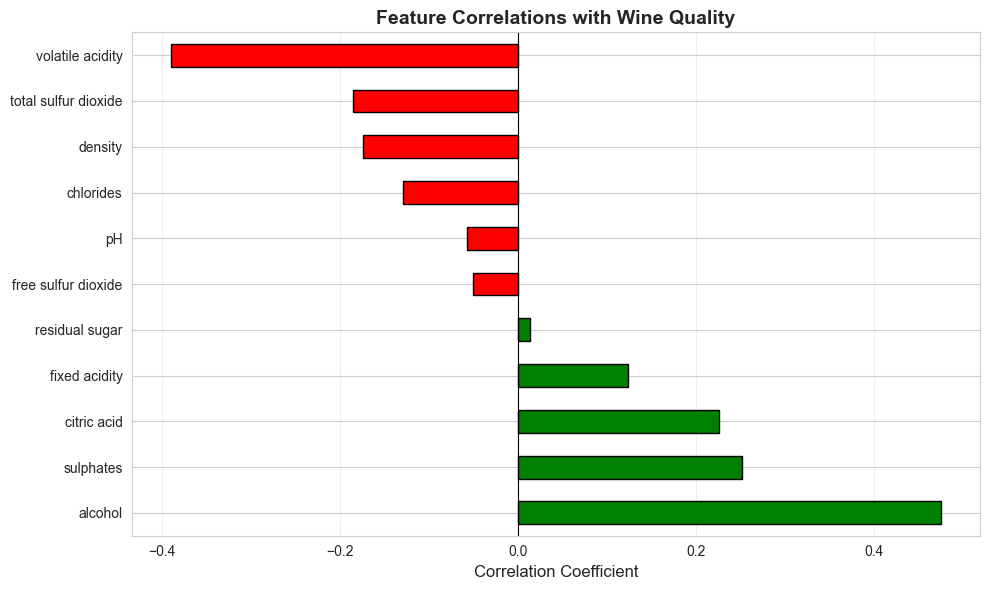

In [16]:
# TODO: Calculate correlations of features with quality
print("Correlation with Quality:")
correlations = df.corr()['quality'].drop('quality').sort_values(ascending=False)
print(correlations)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlations.values]
correlations.plot(kind='barh', ax=ax, color=colors, edgecolor='black')

ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlations with Wine Quality', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Data Preparation - Introduce train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# TODO: Create X, y, then split into training and test sets with train_test_split
X = df.drop('quality', axis=1) # axis 1 for columns (as opposed to 0 for rows)
y = df['quality'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 42 is the default (set explicitly here for reproducity), but this can be any integer
# the reason why it usually defaults to 42 is because the train/test split usually does not make that much
# of a difference in results, so 42 is just a fun reference to "The Hitchhiker's Guide to the Galaxy" 

# When you split data into training and test sets, it's important to ensure that the split is random
# and representative of the overall dataset. This helps to prevent overfitting and ensures that the
# model generalizes well to unseen data, preventing situations such as p-hacking. 
# cherry-picking involves only selecting and reporting results that are aligned with the hypotheses
# and conceptual frameworks that are desired.

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nQuality ratings after adding noise:")
print(f"  Min: {y.min():.2f}, Max: {y.max():.2f}, Mean: {y.mean():.2f}")

Training set: 1279 samples, 11 features
Test set: 320 samples

Quality ratings after adding noise:
  Min: 3.00, Max: 8.00, Mean: 5.64


## Step 9: Baseline - Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# TODO: Train Linear Regression model
"""
in class notes: went over every parameters of linear regression function
    fit_intercept: boolean, default=True
        Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations
    normalize: boolean, default=False   
        This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized
        before regression by subtracting the mean and dividing by the l2-norm.
    copy_X: boolean, default=True
        If True, X will be copied; else, it may be overwritten.
    n_jobs: int, default=None
        The number of jobs to use for the computation. This will only provide speedup for n
        on large problems, especially when multiple targets are involved.
    positive: boolean, default=False
        When set to True, forces the coefficients to be positive.
"""
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# If model is quick to train, we can combine the steps above with fit.transform [not this one]

y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

train_mse_linear = mean_squared_error(y_train, y_pred_train_linear)
test_mse_linear = mean_squared_error(y_test, y_pred_test_linear)
train_r2_linear = r2_score(y_train, y_pred_train_linear)
test_r2_linear = r2_score(y_test, y_pred_test_linear)

print("="*60)
print("Linear Regression Results:")
print("="*60)
print(f"Train MSE: {train_mse_linear:.4f}")
print(f"Test MSE:  {test_mse_linear:.4f}")
print(f"Train R²:  {train_r2_linear:.4f}")
print(f"Test R²:   {test_r2_linear:.4f}")

Linear Regression Results:
Train MSE: 0.4242
Test MSE:  0.3900
Train R²:  0.3480
Test R²:   0.4032


## Step 10: Analyze Linear Model Coefficients

Model Coefficients (sorted):
             Feature  Coefficient
             density   -10.351594
           chlorides    -1.806503
    volatile acidity    -1.001304
           sulphates     0.841172
                  pH    -0.393688
             alcohol     0.281890
         citric acid    -0.140821
       fixed acidity     0.023085
      residual sugar     0.006564
 free sulfur dioxide     0.005627
total sulfur dioxide    -0.003644


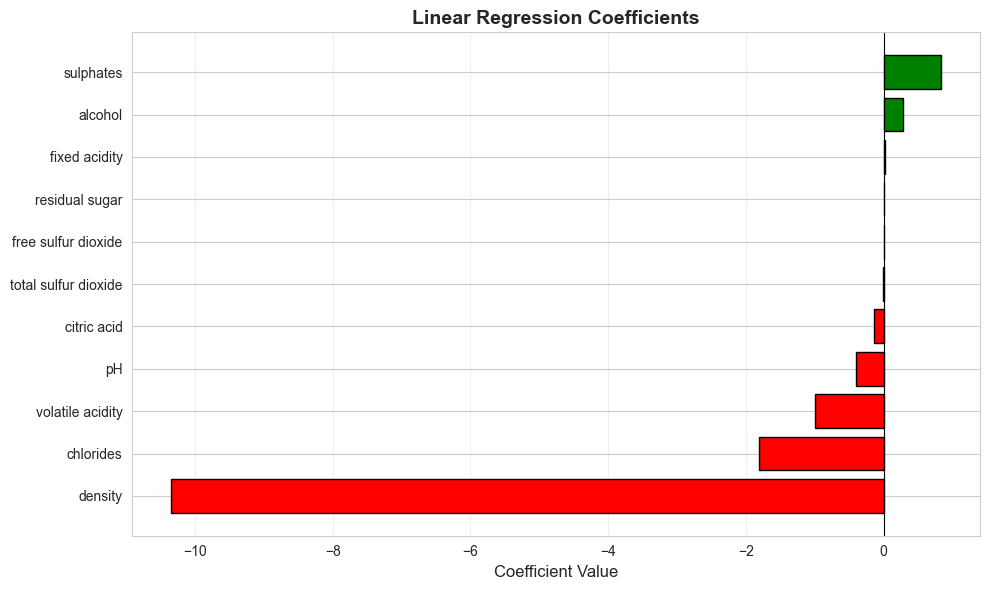

In [21]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values('Coefficient', ascending=True)

print("Model Coefficients (sorted):")
print(coef_df.sort_values('Coefficient', key=abs, ascending=False).to_string(index=False))

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
ax.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')

ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Linear Regression Coefficients', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 11: Visualize Predictions vs Actual

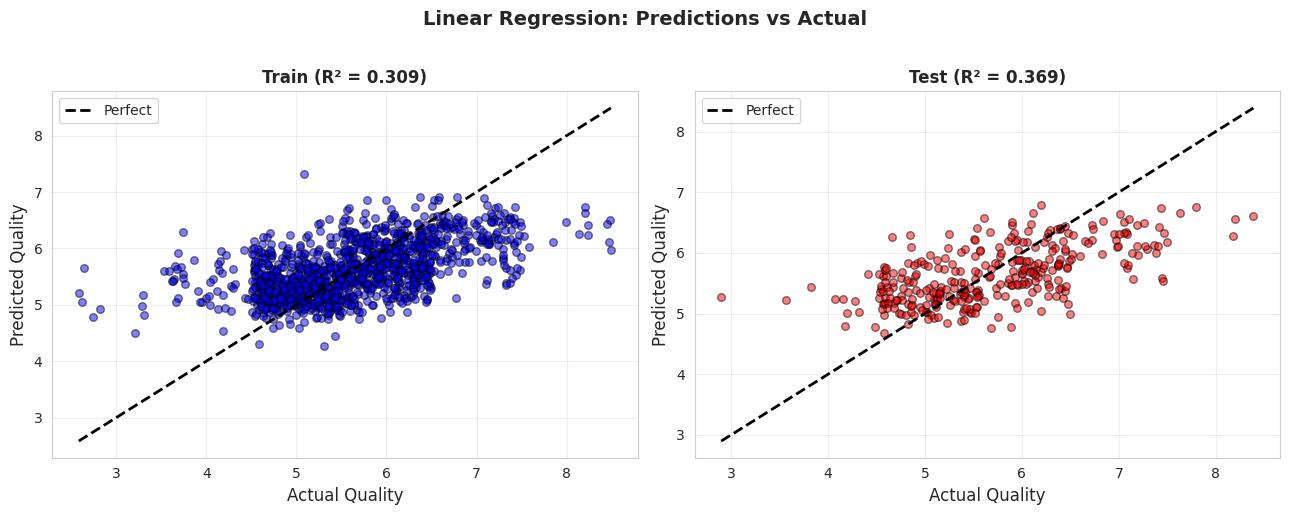

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].scatter(y_train, y_pred_train_linear, alpha=0.5, s=30, color='blue', edgecolor='black')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'k--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual Quality', fontsize=12)
axes[0].set_ylabel('Predicted Quality', fontsize=12)
axes[0].set_title(f'Train (R² = {train_r2_linear:.3f})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test, y_pred_test_linear, alpha=0.5, s=30, color='red', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', lw=2, label='Perfect')
axes[1].set_xlabel('Actual Quality', fontsize=12)
axes[1].set_ylabel('Predicted Quality', fontsize=12)
axes[1].set_title(f'Test (R² = {test_r2_linear:.3f})', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Linear Regression: Predictions vs Actual', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Step 12: Feature Scaling - Introduce StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
# the standard scaler standardizes features by removing the mean and scaling to unit variance
# this is to ensure that each feature contributes equally to the distance computations in algorithms like k-NN and SVM

scale = StandardScaler()
# Philip noting he never had to specify any of the above parameters
# Need to use the same mean and std from training set to scale test set
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

print("Feature Scaling Results:")
print(f"  Training mean: {X_train_scaled.mean(axis=0).mean():.8f}")
print(f"  Training std:  {X_train_scaled.std(axis=0).mean():.4f}")

Feature Scaling Results:
  Training mean: 0.00000000
  Training std:  1.0000


## Step 11.5: Feature Engineering - Log-Normal Distributions

Looking at the feature distributions from Step 5, several variables appear **skewed** (right-tailed).
This suggests they follow a **log-normal distribution**: the log-transformation would make them more normally distributed.

Common examples in wine chemistry:
- **Residual sugar**: Sugar concentrations are log-normally distributed
- **Chlorides**: Salt concentrations follow exponential patterns
- **Sulfur dioxide**: Chemical preservative levels
- **Sulphates**: Another chemical preservative

**Key insight**: Linear regression works better with normally distributed features. 
Log-transforming skewed features can improve model performance without changing the algorithm.

### Identify Skewed Features

In [26]:
# Calculate skewness for each feature
from scipy import stats

skewness = df.drop('quality', axis=1).skew().sort_values(ascending=False) # See https://en.wikipedia.org/wiki/Nonparametric_skew
print("Feature Skewness (values > 1 indicate strong right skew):")
print(skewness)
print()

# Identify highly skewed features (skewness > 1)
skewed_features = skewness[skewness > 1].index.tolist()
print(f"Highly skewed features (candidates for log-transform): {skewed_features}")

Feature Skewness (values > 1 indicate strong right skew):
chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

Highly skewed features (candidates for log-transform): ['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'free sulfur dioxide']


### Visualize Original vs Log-Transformed Distributions

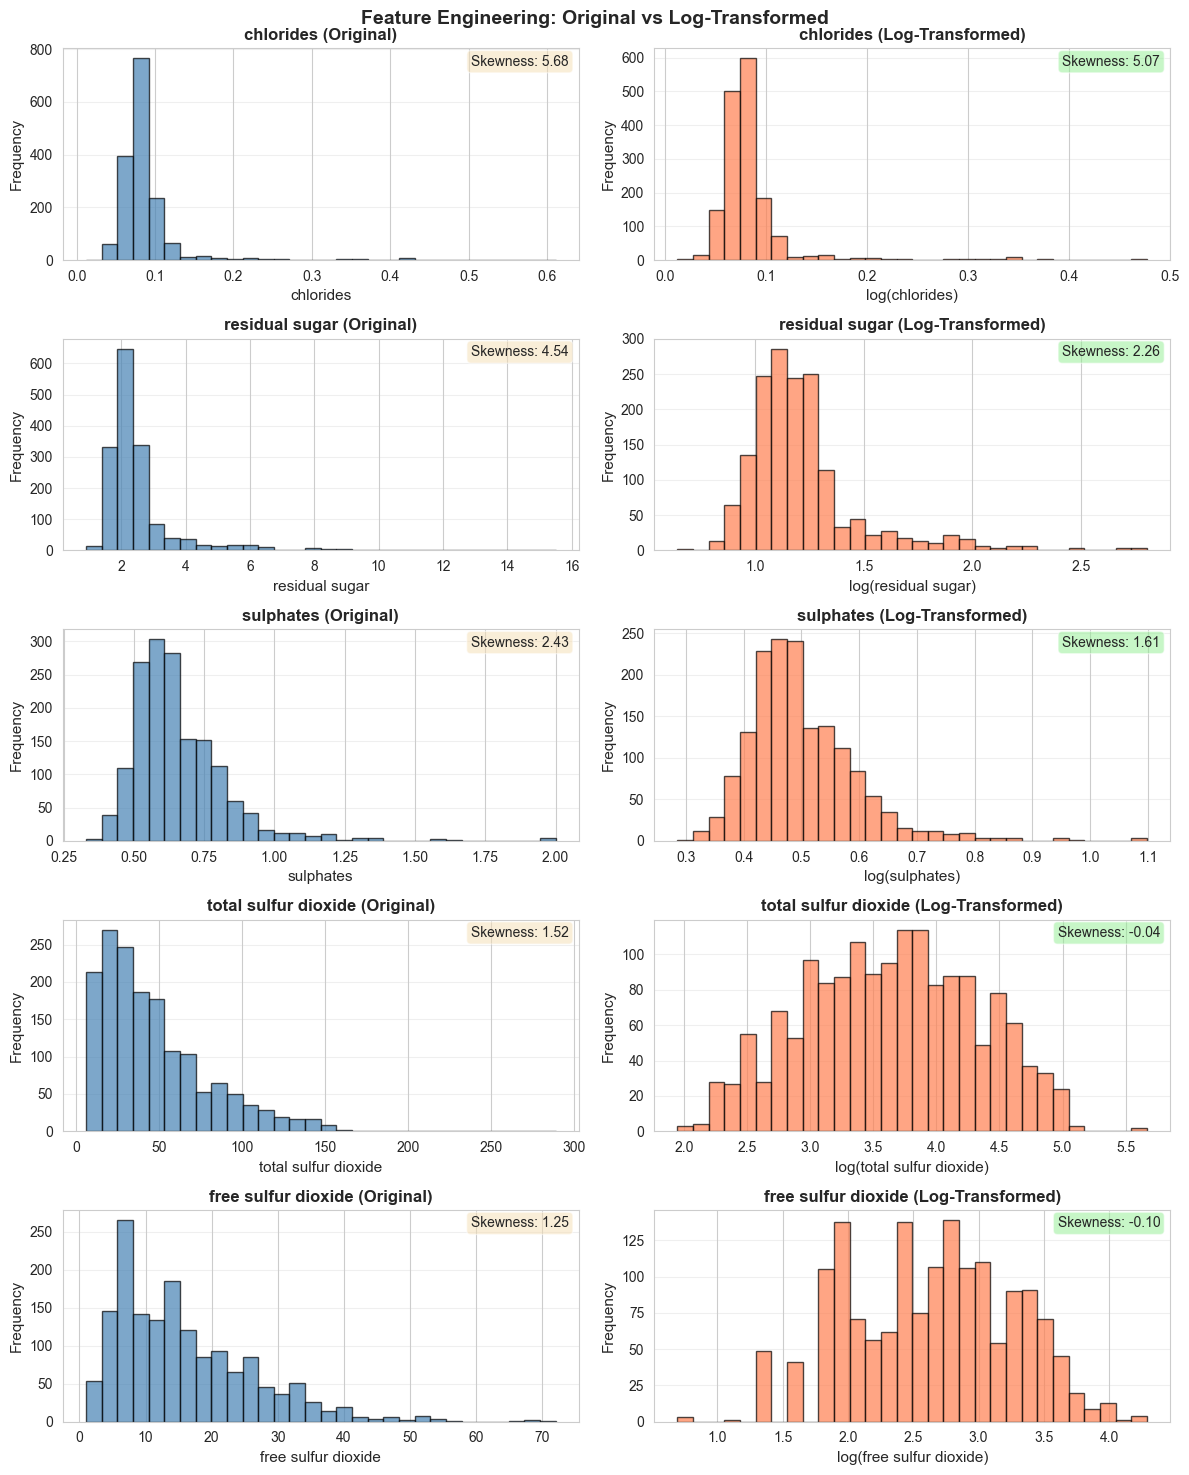


Log-transformation reduces skewness:
  chlorides: 5.68 → 5.07
  residual sugar: 4.54 → 2.26
  sulphates: 2.43 → 1.61
  total sulfur dioxide: 1.52 → -0.04
  free sulfur dioxide: 1.25 → -0.10


In [27]:
# Create comparison plots for skewed features
fig, axes = plt.subplots(len(skewed_features), 2, figsize=(12, 3*len(skewed_features)))

if len(skewed_features) == 1:
    axes = axes.reshape(1, -1)

for idx, feature in enumerate(skewed_features):
    # Original distribution
    axes[idx, 0].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx, 0].set_xlabel(feature, fontsize=11)
    axes[idx, 0].set_ylabel('Frequency', fontsize=11)
    axes[idx, 0].set_title(f'{feature} (Original)', fontsize=12, fontweight='bold')
    axes[idx, 0].grid(axis='y', alpha=0.3)
    axes[idx, 0].text(0.98, 0.97, f'Skewness: {skewness[feature]:.2f}', 
                      transform=axes[idx, 0].transAxes, 
                      ha='right', va='top', fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Log-transformed distribution
    log_feature = np.log1p(df[feature])  # log1p = log(1+x), handles zeros
    log_skewness = log_feature.skew()
    
    axes[idx, 1].hist(log_feature, bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[idx, 1].set_xlabel(f'log({feature})', fontsize=11)
    axes[idx, 1].set_ylabel('Frequency', fontsize=11)
    axes[idx, 1].set_title(f'{feature} (Log-Transformed)', fontsize=12, fontweight='bold')
    axes[idx, 1].grid(axis='y', alpha=0.3)
    axes[idx, 1].text(0.98, 0.97, f'Skewness: {log_skewness:.2f}', 
                      transform=axes[idx, 1].transAxes, 
                      ha='right', va='top', fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

fig.suptitle('Feature Engineering: Original vs Log-Transformed', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nLog-transformation reduces skewness:")
for feature in skewed_features:
    log_feature = np.log1p(df[feature])
    print(f"  {feature}: {skewness[feature]:.2f} → {log_feature.skew():.2f}")

### Create Engineered Features

In [28]:
# Create a new dataset with log-transformed features
df_engineered = df.copy()

# Add log-transformed versions of skewed features
for feature in skewed_features:
    df_engineered[f'log_{feature}'] = np.log1p(df[feature])

print(f"Original dataset: {df.shape[1]} features")
print(f"Engineered dataset: {df_engineered.shape[1]} features")
print(f"\nNew features added:")
for feature in skewed_features:
    print(f"  - log_{feature}")

# Split engineered data the same way as before
X_engineered = df_engineered.drop('quality', axis=1)
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42
)

# Also scale the engineered features for Ridge/Lasso
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

print(f"\nEngineered training set: {X_train_eng.shape[0]} samples, {X_train_eng.shape[1]} features")
print(f"Features scaled for regularization models")


Original dataset: 12 features
Engineered dataset: 17 features

New features added:
  - log_chlorides
  - log_residual sugar
  - log_sulphates
  - log_total sulfur dioxide
  - log_free sulfur dioxide

Engineered training set: 1279 samples, 16 features
Features scaled for regularization models


### Compare Models: Original vs Engineered Features

In [29]:
# Train linear regression on engineered features
eng_model = LinearRegression()
eng_model.fit(X_train_eng, y_train_eng)

y_pred_train_eng = eng_model.predict(X_train_eng)
y_pred_test_eng = eng_model.predict(X_test_eng)

train_mse_eng = mean_squared_error(y_train_eng, y_pred_train_eng)
test_mse_eng = mean_squared_error(y_test_eng, y_pred_test_eng)
train_r2_eng = r2_score(y_train_eng, y_pred_train_eng)
test_r2_eng = r2_score(y_test_eng, y_pred_test_eng)

print("="*70)
print("FEATURE ENGINEERING COMPARISON")
print("="*70)

print(f"\nOriginal Features (11):")
print(f"  Train MSE: {train_mse_linear:.4f}  |  Test MSE: {test_mse_linear:.4f}")
print(f"  Train R²:  {train_r2_linear:.4f}  |  Test R²:  {test_r2_linear:.4f}")

print(f"\nWith Log-Transformed Features ({X_train_eng.shape[1]}):")
print(f"  Train MSE: {train_mse_eng:.4f}  |  Test MSE: {test_mse_eng:.4f}")
print(f"  Train R²:  {train_r2_eng:.4f}  |  Test R²:  {test_r2_eng:.4f}")

improvement_mse = test_mse_linear - test_mse_eng
improvement_r2 = test_r2_eng - test_r2_linear

print(f"\nImprovement:")
print(f"  MSE difference: {improvement_mse:.4f} {'(better)' if improvement_mse > 0 else '(worse)'}")
print(f"  R² difference:  {improvement_r2:+.4f}")
print(f"\nNote: Feature engineering can be as important as algorithm choice!")

FEATURE ENGINEERING COMPARISON

Original Features (11):
  Train MSE: 0.4242  |  Test MSE: 0.3900
  Train R²:  0.3480  |  Test R²:  0.4032

With Log-Transformed Features (16):
  Train MSE: 0.4080  |  Test MSE: 0.3737
  Train R²:  0.3728  |  Test R²:  0.4281

Improvement:
  MSE difference: 0.0163 (better)
  R² difference:  +0.0249

Note: Feature engineering can be as important as algorithm choice!


## Step 13: Train Models with Scikit-Learn Pipelines

Scikit-learn **Pipelines** bundle preprocessing and modeling steps together. This ensures:
- Preprocessing is applied consistently to train and test data
- No data leakage (fitting StandardScaler on test data)
- Cleaner, more readable code
- Easy hyperparameter tuning

Let's train models using pipelines for both original and engineered features.

In [ ]:
from sklearn.pipeline import Pipeline

# TODO: Create pipelines for original and engineered features

# ===== TRAIN PIPELINES =====

# Original features with StandardScaler
pipeline_linear_orig.fit(X_train, y_train)
y_pred_train_orig = pipeline_linear_orig.predict(X_train)
y_pred_test_orig = pipeline_linear_orig.predict(X_test)

train_mse_orig = mean_squared_error(y_train, y_pred_train_orig)
test_mse_orig = mean_squared_error(y_test, y_pred_test_orig)
train_r2_orig = r2_score(y_train, y_pred_train_orig)
test_r2_orig = r2_score(y_test, y_pred_test_orig)

# Engineered features with StandardScaler
pipeline_linear_eng.fit(X_train_eng, y_train_eng)
y_pred_train_eng = pipeline_linear_eng.predict(X_train_eng)
y_pred_test_eng = pipeline_linear_eng.predict(X_test_eng)

train_mse_eng = mean_squared_error(y_train_eng, y_pred_train_eng)
test_mse_eng = mean_squared_error(y_test_eng, y_pred_test_eng)
train_r2_eng = r2_score(y_train_eng, y_pred_train_eng)
test_r2_eng = r2_score(y_test_eng, y_pred_test_eng)

print("="*80)
print("MODELS TRAINED WITH SCIKIT-LEARN PIPELINES")
print("="*80)

print("\nOriginal Features (11):")
print(f"  Train MSE: {train_mse_orig:.4f}  |  Test MSE: {test_mse_orig:.4f}")
print(f"  Train R²:  {train_r2_orig:.4f}  |  Test R²:  {test_r2_orig:.4f}")

print("\nEngineered Features (16):")
print(f"  Train MSE: {train_mse_eng:.4f}  |  Test MSE: {test_mse_eng:.4f}")
print(f"  Train R²:  {train_r2_eng:.4f}  |  Test R²:  {test_r2_eng:.4f}")

print("\nFeature Engineering Improvement:")
mse_improvement = test_mse_orig - test_mse_eng
r2_improvement = test_r2_eng - test_r2_orig
print(f"  MSE: {test_mse_orig:.4f} → {test_mse_eng:.4f} (improvement: {mse_improvement:+.4f})")
print(f"  R²:  {test_r2_orig:.4f} → {test_r2_eng:.4f} (improvement: {r2_improvement:+.4f})")

MODELS TRAINED WITH SCIKIT-LEARN PIPELINES

Original Features (11):
  Train MSE: 0.5091  |  Test MSE: 0.4783
  Train R²:  0.3086  |  Test R²:  0.3692

Engineered Features (16):
  Train MSE: 0.4953  |  Test MSE: 0.4645
  Train R²:  0.3273  |  Test R²:  0.3874

Feature Engineering Improvement:
  MSE: 0.4783 → 0.4645 (improvement: +0.0138)
  R²:  0.3692 → 0.3874 (improvement: +0.0182)


MODEL PERFORMANCE SUMMARY
            Model     Feature Set  Train MSE  Test MSE  Train R²  Test R²
Linear Regression   Original (11)   0.509066  0.478338  0.308624 0.369217
Linear Regression Engineered (16)   0.495322  0.464526  0.327290 0.387431


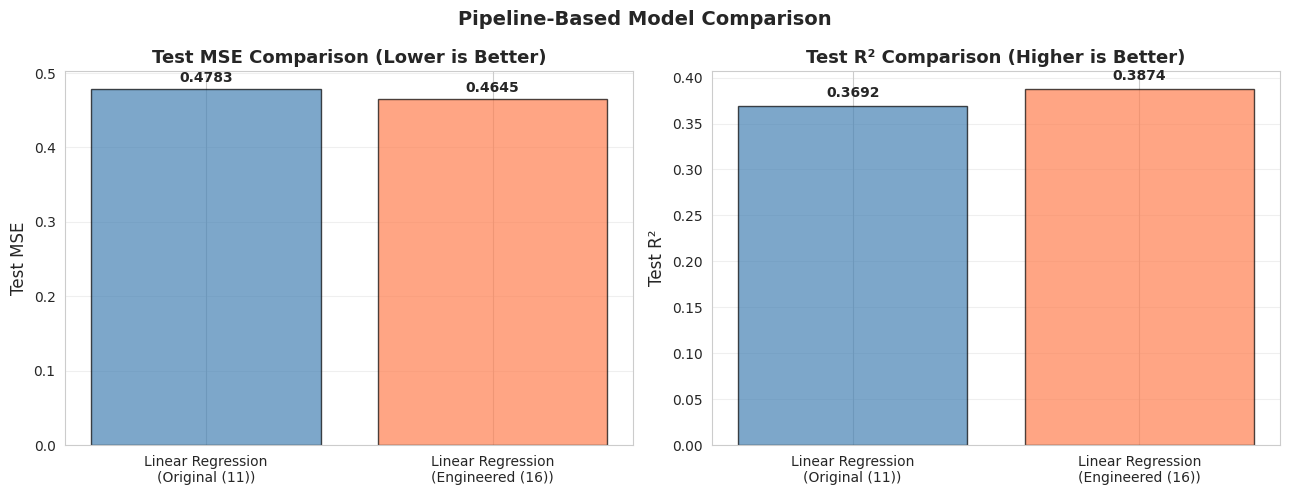


🏆 BEST MODEL: Linear Regression with Engineered (16)
Test MSE: 0.4645
Test R²:  0.3874


In [ ]:
# Consolidated comparison of models
comparison_data = [
    {
        'Model': 'Linear Regression',
        'Feature Set': 'Original (11)',
        'Train MSE': train_mse_orig,
        'Test MSE': test_mse_orig,
        'Train R²': train_r2_orig,
        'Test R²': test_r2_orig
    },
    {
        'Model': 'Linear Regression',
        'Feature Set': 'Engineered (16)',
        'Train MSE': train_mse_eng,
        'Test MSE': test_mse_eng,
        'Train R²': train_r2_eng,
        'Test R²': test_r2_eng
    }
]

comparison_df = pd.DataFrame(comparison_data)

print("="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Test MSE comparison
models = comparison_df['Model'] + '\n(' + comparison_df['Feature Set'] + ')'
colors = ['steelblue', 'coral']
axes[0].bar(models, comparison_df['Test MSE'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Test MSE', fontsize=12)
axes[0].set_title('Test MSE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Test MSE']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

# Test R² comparison
axes[1].bar(models, comparison_df['Test R²'], color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Test R²', fontsize=12)
axes[1].set_title('Test R² Comparison (Higher is Better)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Test R²']):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('Pipeline-Based Model Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Best model
best_idx = comparison_df['Test MSE'].idxmin()
best_model = comparison_df.loc[best_idx]

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model['Model']} with {best_model['Feature Set']}")
print(f"{'='*80}")
print(f"Test MSE: {best_model['Test MSE']:.4f}")
print(f"Test R²:  {best_model['Test R²']:.4f}")
print(f"{'='*80}")

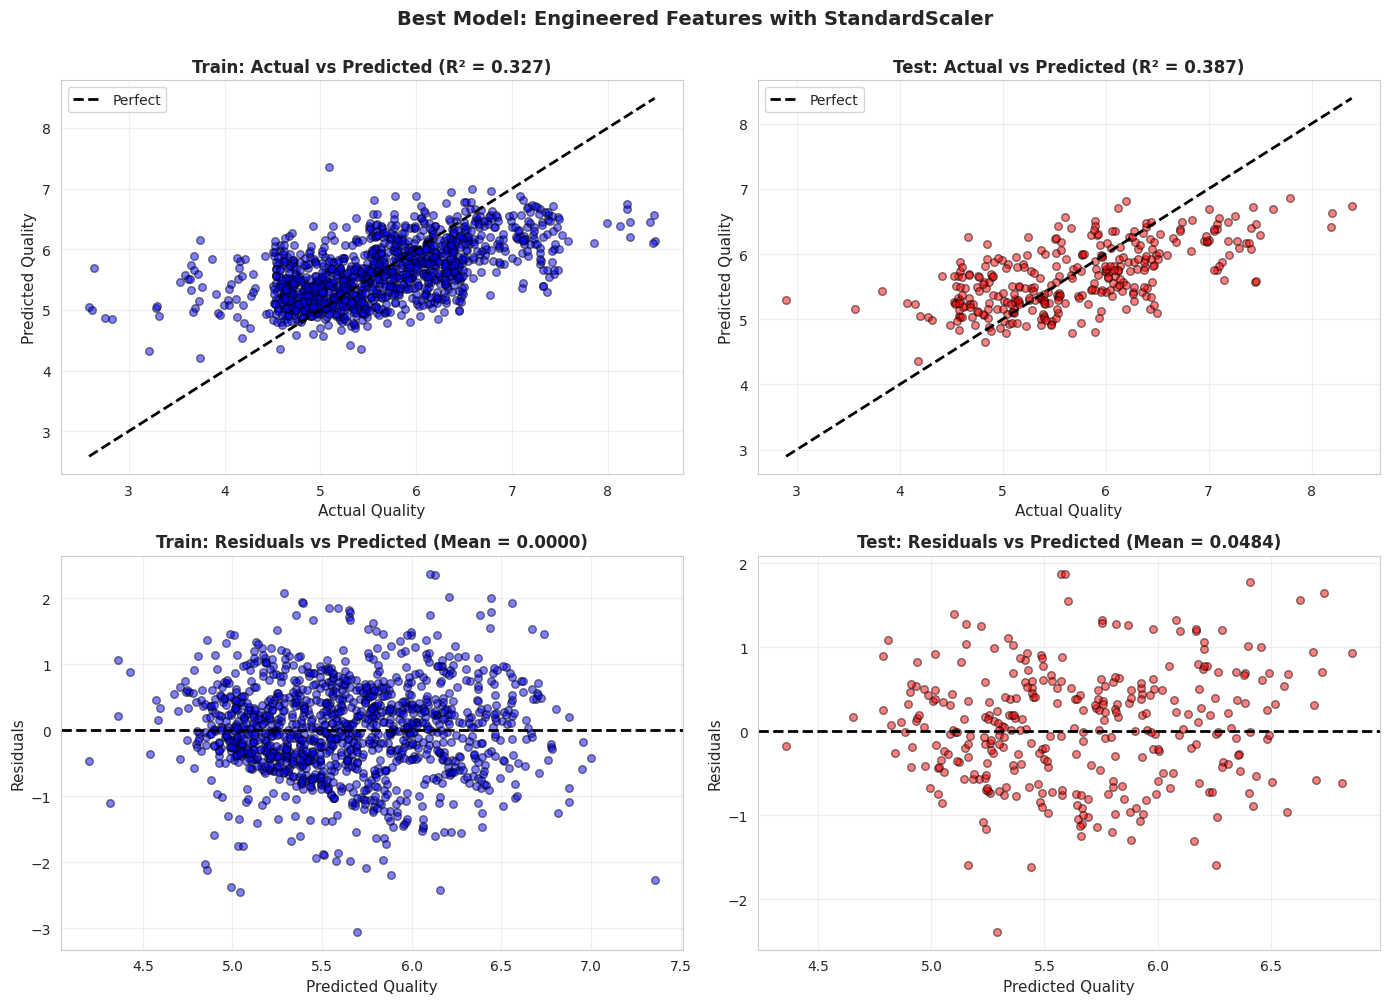

RESIDUAL ANALYSIS - BEST MODEL

Train Residuals:
  Mean:       0.0000  (should be close to 0)
  Std Dev:    0.7041
  Min:       -3.0558
  Max:        2.3732

Test Residuals:
  Mean:       0.0484  (should be close to 0)
  Std Dev:    0.6809
  Min:       -2.3900
  Max:        1.8769

Key observations:
  - Mean residuals should be close to 0 (no systematic bias)
  - Residuals should be randomly scattered (no patterns)
  - Most residuals should be within ±1.36 (95% confidence)

BEST MODEL COEFFICIENTS (by absolute value)
                Feature  Coefficient
          log_sulphates     1.114072
              sulphates    -0.949013
                alcohol     0.272122
              chlorides    -0.162545
       volatile acidity    -0.145640
   total sulfur dioxide    -0.134983
                     pH    -0.119252
          log_chlorides     0.070710
log_free sulfur dioxide     0.066118
                density    -0.048671


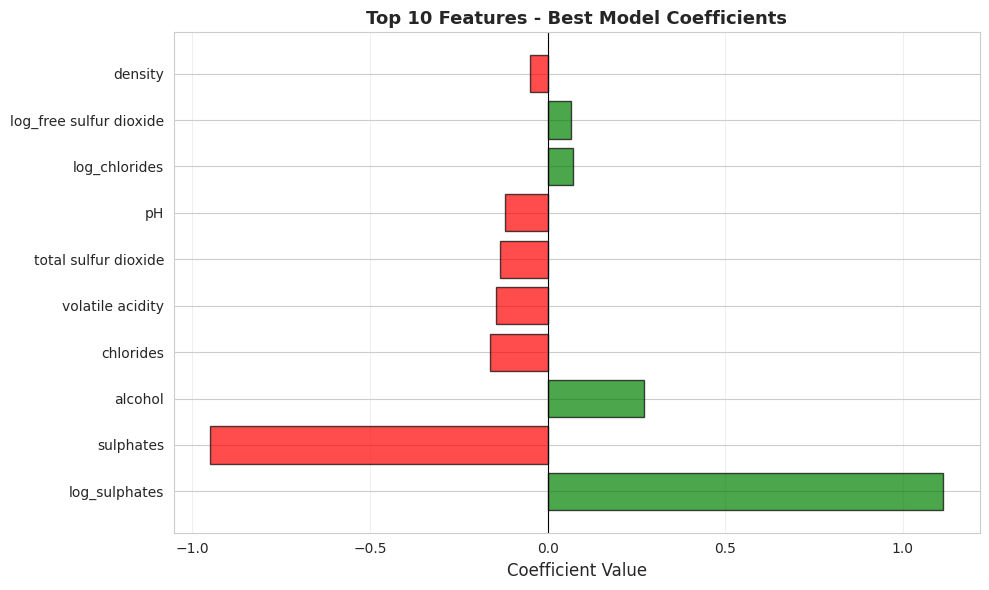

In [ ]:
# Visualize best model predictions and residuals
best_pipeline = pipeline_linear_eng
best_y_pred_train = y_pred_train_eng
best_y_pred_test = y_pred_test_eng
best_y_train = y_train_eng
best_y_test = y_test_eng

# Calculate residuals
residuals_train = best_y_train - best_y_pred_train
residuals_test = best_y_test - best_y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Actual vs Predicted (Train)
axes[0, 0].scatter(best_y_train, best_y_pred_train, alpha=0.5, s=30, color='blue', edgecolor='black')
axes[0, 0].plot([best_y_train.min(), best_y_train.max()], [best_y_train.min(), best_y_train.max()], 
             'k--', lw=2, label='Perfect')
axes[0, 0].set_xlabel('Actual Quality', fontsize=11)
axes[0, 0].set_ylabel('Predicted Quality', fontsize=11)
axes[0, 0].set_title(f'Train: Actual vs Predicted (R² = {train_r2_eng:.3f})', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Actual vs Predicted (Test)
axes[0, 1].scatter(best_y_test, best_y_pred_test, alpha=0.5, s=30, color='red', edgecolor='black')
axes[0, 1].plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 
             'k--', lw=2, label='Perfect')
axes[0, 1].set_xlabel('Actual Quality', fontsize=11)
axes[0, 1].set_ylabel('Predicted Quality', fontsize=11)
axes[0, 1].set_title(f'Test: Actual vs Predicted (R² = {test_r2_eng:.3f})', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Residuals vs Predicted (Train)
axes[1, 0].scatter(best_y_pred_train, residuals_train, alpha=0.5, s=30, color='blue', edgecolor='black')
axes[1, 0].axhline(y=0, color='k', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Quality', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title(f'Train: Residuals vs Predicted (Mean = {residuals_train.mean():.4f})', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Residuals vs Predicted (Test)
axes[1, 1].scatter(best_y_pred_test, residuals_test, alpha=0.5, s=30, color='red', edgecolor='black')
axes[1, 1].axhline(y=0, color='k', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Quality', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title(f'Test: Residuals vs Predicted (Mean = {residuals_test.mean():.4f})', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Best Model: Engineered Features with StandardScaler', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Residual statistics
print("="*80)
print("RESIDUAL ANALYSIS - BEST MODEL")
print("="*80)
print(f"\nTrain Residuals:")
print(f"  Mean:     {residuals_train.mean():>8.4f}  (should be close to 0)")
print(f"  Std Dev:  {residuals_train.std():>8.4f}")
print(f"  Min:      {residuals_train.min():>8.4f}")
print(f"  Max:      {residuals_train.max():>8.4f}")

print(f"\nTest Residuals:")
print(f"  Mean:     {residuals_test.mean():>8.4f}  (should be close to 0)")
print(f"  Std Dev:  {residuals_test.std():>8.4f}")
print(f"  Min:      {residuals_test.min():>8.4f}")
print(f"  Max:      {residuals_test.max():>8.4f}")

print(f"\nKey observations:")
print(f"  - Mean residuals should be close to 0 (no systematic bias)")
print(f"  - Residuals should be randomly scattered (no patterns)")
print(f"  - Most residuals should be within ±{2 * residuals_test.std():.2f} (95% confidence)")

# Model coefficients
best_model_obj = best_pipeline.named_steps['model']
coef_df = pd.DataFrame({
    'Feature': X_train_eng.columns,
    'Coefficient': best_model_obj.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*80)
print("BEST MODEL COEFFICIENTS (by absolute value)")
print("="*80)
print(coef_df.head(10).to_string(index=False))

# Visualize top coefficients
fig, ax = plt.subplots(figsize=(10, 6))
top_n = 10
top_coefs = coef_df.head(top_n)
colors = ['green' if x > 0 else 'red' for x in top_coefs['Coefficient']]
ax.barh(top_coefs['Feature'], top_coefs['Coefficient'], color=colors, edgecolor='black', alpha=0.7)

ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title(f'Top {top_n} Features - Best Model Coefficients', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

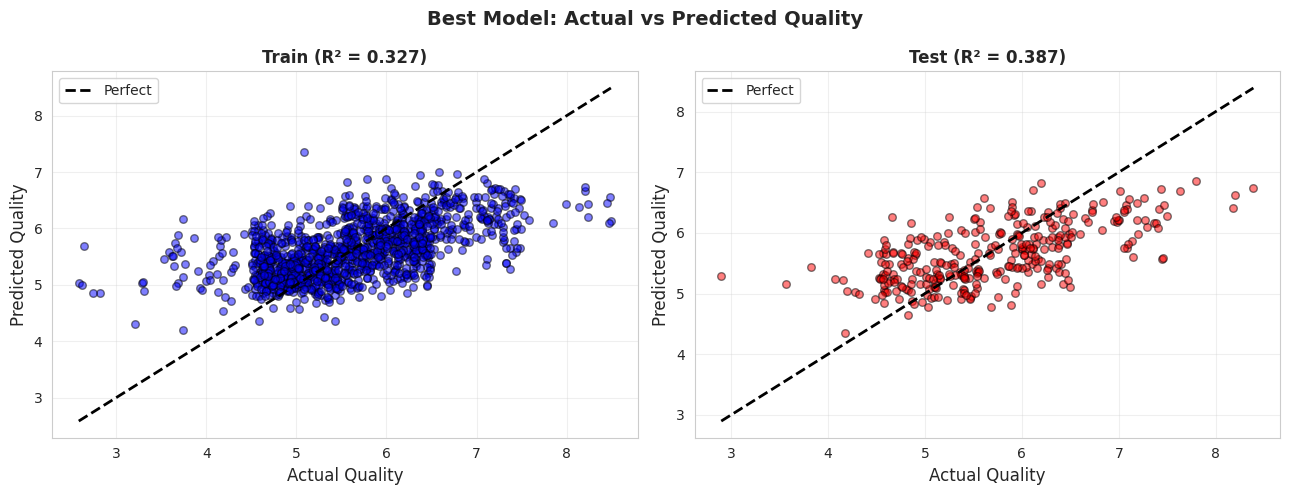


Best Model Coefficients (by absolute value):
                Feature  Coefficient
          log_sulphates     1.114072
              sulphates    -0.949013
                alcohol     0.272122
              chlorides    -0.162545
       volatile acidity    -0.145640
   total sulfur dioxide    -0.134983
                     pH    -0.119252
          log_chlorides     0.070710
log_free sulfur dioxide     0.066118
                density    -0.048671


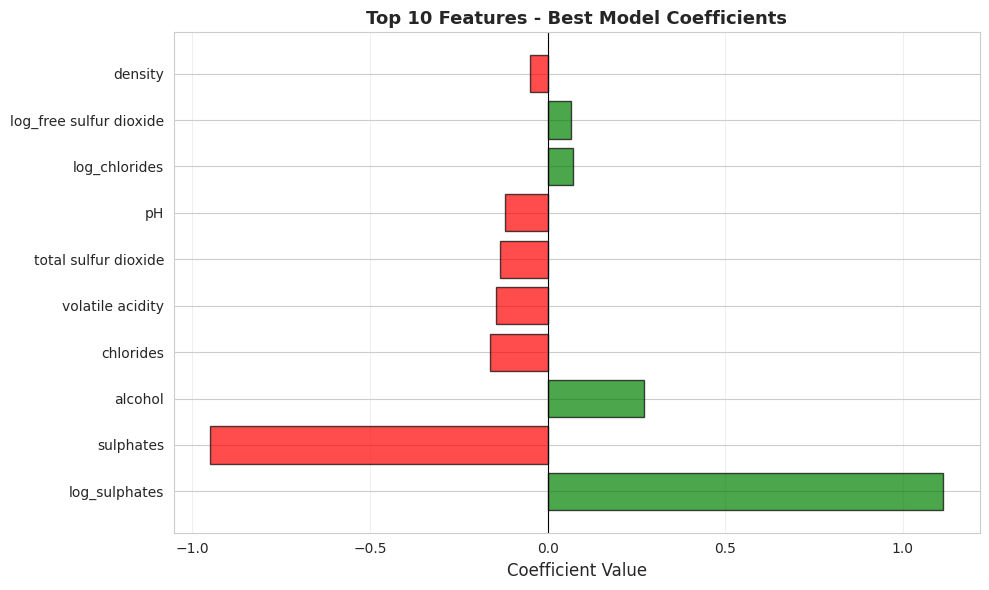

In [ ]:
# Visualize predictions for the best model (engineered features)
best_pipeline = pipeline_linear_eng
best_y_pred_train = y_pred_train_eng
best_y_pred_test = y_pred_test_eng

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Train predictions
axes[0].scatter(y_train_eng, best_y_pred_train, alpha=0.5, s=30, color='blue', edgecolor='black')
axes[0].plot([y_train_eng.min(), y_train_eng.max()], [y_train_eng.min(), y_train_eng.max()], 
             'k--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual Quality', fontsize=12)
axes[0].set_ylabel('Predicted Quality', fontsize=12)
axes[0].set_title(f'Train (R² = {train_r2_eng:.3f})', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Test predictions
axes[1].scatter(y_test_eng, best_y_pred_test, alpha=0.5, s=30, color='red', edgecolor='black')
axes[1].plot([y_test_eng.min(), y_test_eng.max()], [y_test_eng.min(), y_test_eng.max()], 
             'k--', lw=2, label='Perfect')
axes[1].set_xlabel('Actual Quality', fontsize=12)
axes[1].set_ylabel('Predicted Quality', fontsize=12)
axes[1].set_title(f'Test (R² = {test_r2_eng:.3f})', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.suptitle('Best Model: Actual vs Predicted Quality', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Model coefficients
best_model_obj = best_pipeline.named_steps['model']
coef_df = pd.DataFrame({
    'Feature': X_train_eng.columns,
    'Coefficient': best_model_obj.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nBest Model Coefficients (by absolute value):")
print(coef_df.head(10).to_string(index=False))

# Visualize top coefficients
fig, ax = plt.subplots(figsize=(10, 6))
top_n = 10
top_coefs = coef_df.head(top_n)
colors = ['green' if x > 0 else 'red' for x in top_coefs['Coefficient']]
ax.barh(top_coefs['Feature'], top_coefs['Coefficient'], color=colors, edgecolor='black', alpha=0.7)

ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title(f'Top {top_n} Features - Best Model Coefficients', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()